## Regression Model 

In this project, we will build a model to predict a price car under selected variables and features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
df = pd.read_csv("C:/Users/AXIOO/Downloads/automobileEDA.csv")
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [3]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [4]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-system, dtype: int64

bore
False    201
Name: bore, dtype:

In [5]:
df["horsepower-binned"].value_counts()

Low       115
Medium     62
High       23
Name: horsepower-binned, dtype: int64

In [6]:
df.replace(" ", np.nan, inplace = True)

In [7]:
df["horsepower-binned"].replace(np.nan, "Low", inplace = True)

In [8]:
df["horsepower-binned"].value_counts()

Low       116
Medium     62
High       23
Name: horsepower-binned, dtype: int64

Load modules for Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


We can use sort_values() to see feature which has the best correlation with price.

In [59]:
df.corr()["price"].sort_values()

highway-mpg         -0.704692
city-mpg            -0.686571
gas                 -0.110326
peak-rpm            -0.101616
symboling           -0.082391
compression-ratio    0.071107
stroke               0.082310
diesel               0.110326
normalized-losses    0.133999
height               0.135486
bore                 0.543155
wheel-base           0.584642
length               0.690628
width                0.751265
city-L/100km         0.789898
horsepower           0.809575
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64

In this project, we choose horsepower, engine-size, highway-mpg, and curb-weight as predictor variable.

In [12]:
df[["price", "horsepower", "engine-size", "highway-mpg", "curb-weight"]].corr()

,price,horsepower,engine-size,highway-mpg,curb-weight
price,1.000000,0.809575,0.872335,-0.704692,0.834415
horsepower,0.809575,1.000000,0.822676,-0.804575,0.757976
engine-size,0.872335,0.822676,1.000000,-0.679571,0.849072
highway-mpg,-0.704692,-0.804575,-0.679571,1.000000,-0.794889
curb-weight,0.834415,0.757976,0.849072,-0.794889,1.000000


create linear regression with response variable is price and predictor variable above.

X = horsepower <br>
Y = price

In [13]:
X = df[["horsepower"]]
Y = df["price"]
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
Yhat = lr.predict(X)
Yhat[:5]

array([14514.76823442, 14514.76823442, 21918.64247666, 12965.1201372 ,
       15203.50072207])

In [15]:
print("a is ", lr.intercept_)
print("b is ", lr.coef_)
print("We get the linear model: y = ", lr.intercept_, " + ", lr.coef_, "x")

a is  -4597.558297892905
b is  [172.18312191]
We get the linear model: y =  -4597.558297892905  +  [172.18312191] x


X = engine-size <br>
Y = price

In [16]:
lr = LinearRegression()
X = df[["engine-size"]]
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print("a is ", lr.intercept_)
print("b is ", lr.coef_)
print("We get the linear model: y = ", lr.intercept_, " + ", lr.coef_, "x")

a is  -7963.338906281042
b is  [166.86001569]
We get the linear model: y =  -7963.338906281042  +  [166.86001569] x


X = highway-mpg<br>
Y = price

In [18]:
lr = LinearRegression()
X = df[["highway-mpg"]]
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print("a is ", lr.intercept_)
print("b is ", lr.coef_)
print("We get the linear model: y = ", lr.intercept_, " + ", lr.coef_, "x")

a is  38423.305858157415
b is  [-821.73337832]
We get the linear model: y =  38423.305858157415  +  [-821.73337832] x


X = curb-weight<br>
Y = price

In [20]:
lr = LinearRegression()
X = df[["curb-weight"]]
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print("a is ", lr.intercept_)
print("b is ", lr.coef_)
print("We get the linear model: y = ", lr.intercept_, " + ", lr.coef_, "x")

a is  -19553.57063622749
b is  [12.818847]
We get the linear model: y =  -19553.57063622749  +  [12.818847] x


Now we turn to create multiple linear regression with the four predictor variable above. After that, we will compare the result and determine the best model to predict price car.

X1 = horsepower <br>
X2 = engine-size <br>
X3 = highway-mpg <br>
X4 = curb-weight <br>
Y = price

In [22]:
lr = LinearRegression()
Z = df[["horsepower", "engine-size", "highway-mpg", "curb-weight"]]
lr.fit(Z, df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("a is ", lr.intercept_)
print("The value of the b's are ", lr.coef_)
print("We get the linear model: y = ", lr.intercept_, " + ", lr.coef_[0], "x1", " + ", 
      lr.coef_[1], "x2", " + ", lr.coef_[2], "x3", " + ", lr.coef_[3], "x4")

a is  -15806.62462632914
The value of the b's are  [53.49574423 81.53026382 36.05748882  4.70770099]
We get the linear model: y =  -15806.62462632914  +  53.49574422604861 x1  +  81.5302638212277 x2  +  36.05748881648544 x3  +  4.70770099461393 x4


Model Evaluation using Visualization and quantitatve measure using:
- R-squared
- Mean Squared Error

Import the visualization package seaborn

In [24]:
import seaborn as sns
%matplotlib inline

First, we create regression plot. Then, we compute R-square and MSE. For MSE, we import the function mean_squared_error  from the module metrics.

In [25]:
from sklearn.metrics import mean_squared_error

R-Square is  0.6554109795391572
MSE is  21654544.39825428


Text(0.5, 1.0, 'Price vs Horsepower')

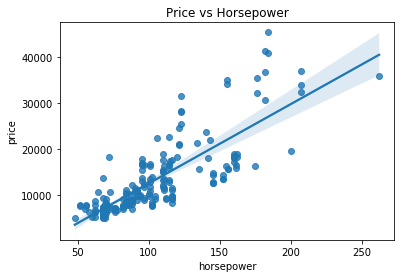

In [26]:
lr = LinearRegression()
X = df[["horsepower"]]
Y = df["price"]
lr.fit(X, Y)
Yhat = lr.predict(X)
mse = mean_squared_error(df["price"], Yhat)
print("R-Square is ", lr.score(X,Y))
print("MSE is ", mse)

sns.regplot(x = "horsepower", y = "price", data = df)
plt.title("Price vs Horsepower")

We can see from the curve fitting, price is positively correlated with horsepower because the regression slope is positive. Let's compare the reggresion plot with the other linear model.

R-Square is  0.7609686443622008
MSE is  15021126.025174143


Text(0.5, 1.0, 'Price vs Engine-size')

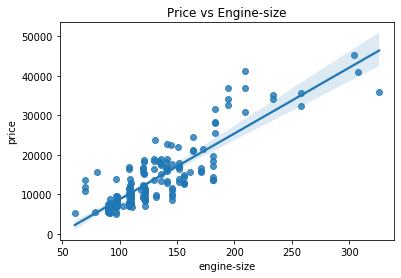

In [27]:
lr = LinearRegression()
X = df[["engine-size"]]
Y = df["price"]
lr.fit(X, Y)
Yhat = lr.predict(X)
mse = mean_squared_error(df["price"], Yhat)
print("R-Square is ", lr.score(X,Y))
print("MSE is ", mse)

sns.regplot(x = "engine-size", y = "price", data = df)
plt.title("Price vs Engine-size")

R-Square is  0.4965911884339176
MSE is  31635042.944639888


Text(0.5, 1.0, 'Price vs Highway-mpg')

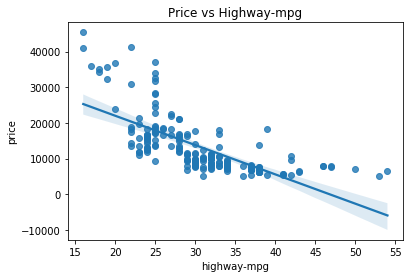

In [28]:
lr = LinearRegression()
X = df[["highway-mpg"]]
Y = df["price"]
lr.fit(X, Y)
Yhat = lr.predict(X)
mse = mean_squared_error(df["price"], Yhat)
print("R-Square is ", lr.score(X,Y))
print("MSE is ", mse)

sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.title("Price vs Highway-mpg")

R-Square is  0.6962476008164488
MSE is  19088303.525747165


Text(0.5, 1.0, 'Price vs Curb-weight')

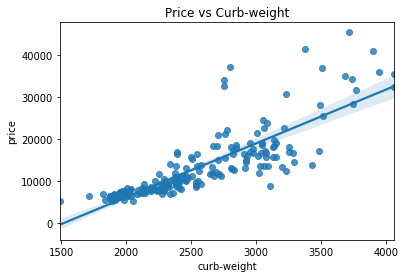

In [29]:
lr = LinearRegression()
X = df[["curb-weight"]]
Y = df["price"]
lr.fit(X, Y)
Yhat = lr.predict(X)
mse = mean_squared_error(df["price"], Yhat)
print("R-Square is ", lr.score(X,Y))
print("MSE is ", mse)

sns.regplot(x = "curb-weight", y = "price", data = df)
plt.title("Price vs Curb-weight")

Based on the result above, we can conclude that linear model with engine-size as predictor variables is the best model with the highest R-square and smallest MSE.

Now, we want to compare the result with multiple linear regression. Regression plot is only used for linear regression. For multiple linear regression, we can create distribution plot. By distribution plot, we can see distribution from fitted values compare with the actual values.

R-square is  0.8093562806577457
MSE is  11980366.87072649


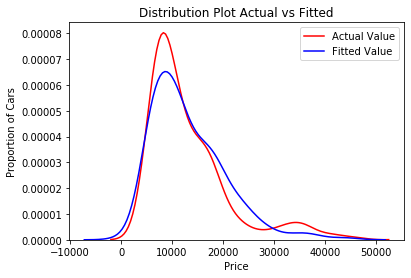

In [30]:
lr = LinearRegression()
Z = df[["horsepower", "engine-size", "highway-mpg", "curb-weight"]]
lr.fit(Z, df["price"])
Yhat = lr.predict(Z)
mse = mean_squared_error(df["price"], Yhat)
print("R-square is ", lr.score(Z, df["price"]))
print("MSE is ", mse)

ax1 = sns.distplot(df["price"], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat, hist = False, color = "b", label = "Fitted Value")
plt.title("Distribution Plot Actual vs Fitted")
plt.xlabel("Price")
plt.ylabel("Proportion of Cars")
plt.show()
plt.close()

If we compare linear model with predictor engine-size and multiple regression with four predictor include engine-size, we can conclude that multiple regression model is the best fitted model for determining price of car because the R-square is bigger and MSE is smaller than linear model with predictor engine-size.

Now, we want to try another fitted model, polynomial regression, with predictor variable is highway-mpg for example. 

In [31]:
X = df["highway-mpg"]
Y = df["price"]

#we use polynomial 3rd order 
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


From the result, we have polynomial model <br>
$$ \hat y = -1.557 x^3 + 204.8 x^2 - 8965 x + 1.379 \times 10^5 $$

Text(0, 0.5, 'Price')

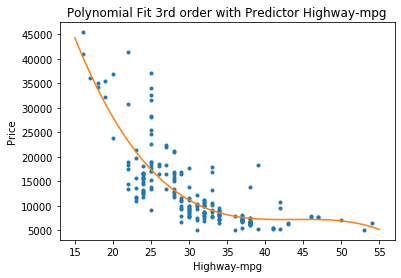

In [32]:
x_new = np.linspace(15, 55, 100)
y_new = p(x_new)

plt.plot(X, Y, ".", x_new, y_new, "-")
plt.title("Polynomial Fit 3rd order with Predictor Highway-mpg")
plt.xlabel("Highway-mpg")
plt.ylabel("Price")

compute R-square and MSE

In [33]:
from sklearn.metrics import r2_score

In [34]:
r_square = r2_score(Y, p(X))
mse = mean_squared_error(df["price"], p(X))
print("R-square is ", r_square)
print("MSE is ", mse)

R-square is  0.674194666390652
MSE is  20474146.426361218


If we compare polynomial fitted and linear regression with highway-mpg as a predictor variable, polynomial fitted has a larger R-square and smaller MSE. So, we believe that polynomial regression 3rd order with highway-mpg as a predictor variable give a better result. <br>
Below, we conduct another polynomial regression model with the rest of predictor variable.

           3         2
-0.006641 x + 3.645 x - 433.4 x + 2.208e+04
R-square is  0.7901519931574331
MSE is  13187196.083555732


Text(0, 0.5, 'Price')

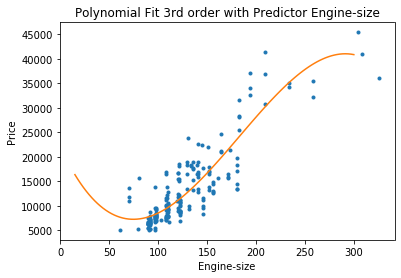

In [53]:
X = df["engine-size"]
Y = df["price"]

#we use polynomial 3rd order 
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
print(p)

r_square = r2_score(Y, p(X))
mse = mean_squared_error(df["price"], p(X))
print("R-square is ", r_square)
print("MSE is ", mse)

x_new = np.linspace(15,300, 100)
y_new = p(x_new)

plt.plot(X, Y, ".", x_new, y_new, "-")
plt.title("Polynomial Fit 3rd order with Predictor Engine-size")
plt.xlabel("Engine-size")
plt.ylabel("Price")

           3         2
-0.004377 x + 2.044 x - 113.3 x + 7211
R-square is  0.6627880537087625
MSE is  21190956.847144


Text(0, 0.5, 'Price')

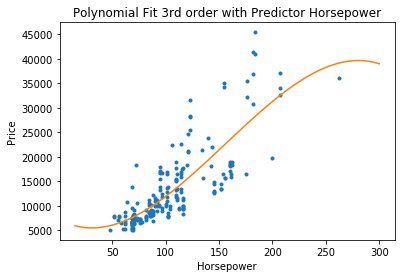

In [52]:
X = df["horsepower"]
Y = df["price"]

#we use polynomial 3rd order 
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
print(p)

r_square = r2_score(Y, p(X))
mse = mean_squared_error(df["price"], p(X))
print("R-square is ", r_square)
print("MSE is ", mse)

x_new = np.linspace(15,300, 100)
y_new = p(x_new)

plt.plot(X, Y, ".", x_new, y_new, "-")
plt.title("Polynomial Fit 3rd order with Predictor Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Price")

           4             3          2
8.384e-10 x - 8.757e-06 x + 0.0368 x - 61.04 x + 3.84e+04
R-square is  0.7203279493433994
MSE is  17575054.567307


Text(0, 0.5, 'Price')

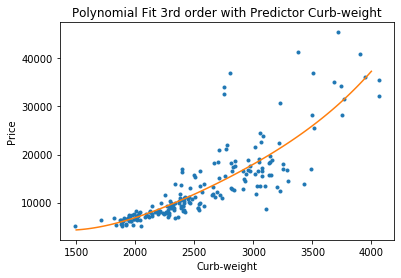

In [58]:
X = df["curb-weight"]
Y = df["price"]

#we use polynomial 3rd order 
f = np.polyfit(X, Y, 4)
p = np.poly1d(f)
print(p)

r_square = r2_score(Y, p(X))
mse = mean_squared_error(df["price"], p(X))
print("R-square is ", r_square)
print("MSE is ", mse)

x_new = np.linspace(1500,4000, 100)
y_new = p(x_new)

plt.plot(X, Y, ".", x_new, y_new, "-")
plt.title("Polynomial Fit 3rd order with Predictor Curb-weight")
plt.xlabel("Curb-weight")
plt.ylabel("Price")

For polynomial regression, we conclude that Engine-size as predictor variable with 3rd order polynomial model give the best result with the largest R-square and smallest MSE among the other polynomial regression model. But, this model doesn't give a better result if we compare with multiple linear regression which created before.